In [1]:
import numpy as np, pandas as pd

# DV tools
import seaborn as sns
import matplotlib.pyplot as plt

# Regression libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Warnings and ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock = pd.read_csv('MLR_Q10_StockPrice.csv')
stock.head()

,Electric Utility,Stock Price,ROE,Dividend
0,1,$23,13.7,2.36
1,2,$34,12.8,3.12
2,3,$20,6.9,2.48
3,4,$24,12.7,2.36
4,5,$20,15.3,1.92


In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Electric Utility  16 non-null     int64  
 1   Stock Price       16 non-null     object 
 2   ROE               16 non-null     float64
 3   Dividend          16 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 640.0+ bytes


In [4]:
# Dropping 'Electric Utility' attribute as it has nothing to do with stock price.
stock.drop(['Electric Utility'], inplace=True, axis=1)

# Extracting Stock price as floating point number
stock['Stock Price'] = stock['Stock Price'].str.replace('$','').astype(float)

### Data Visualization:

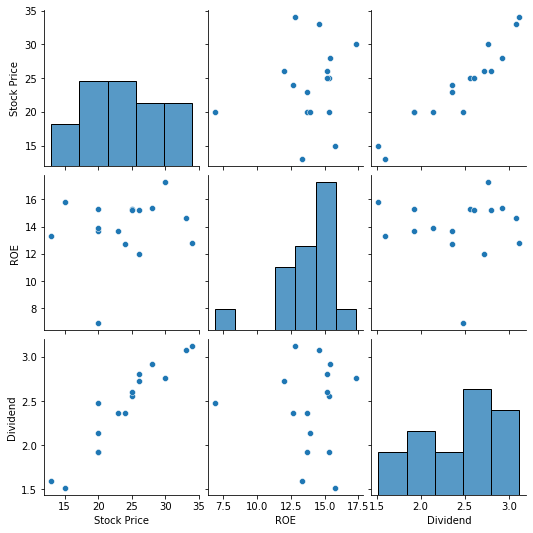

In [5]:
sns.pairplot(data=stock)
plt.show()

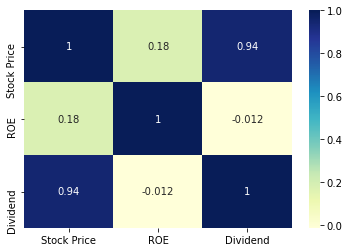

In [6]:
sns.heatmap(stock.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [7]:
X = stock.drop('Stock Price', axis=1)
X.head()

,ROE,Dividend
0,13.7,2.36
1,12.8,3.12
2,6.9,2.48
3,12.7,2.36
4,15.3,1.92


In [8]:
y = stock['Stock Price']
y.head()

0    23.0
1    34.0
2    20.0
3    24.0
4    20.0
Name: Stock Price, dtype: float64

From above graph we can see that Dividend and Stock price has a kind of linear relation

### Building a model

In [9]:
X_sm = sm.add_constant(X)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y, X_sm).fit()

In [10]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            Stock Price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     84.31
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.60e-08
Time:                        23:14:12   Log-Likelihood:                -29.298
No. Observations:                  16   AIC:                             64.60
Df Residuals:                      13   BIC:                             66.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9537      3.405     -2.923      0.0

In [11]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr.params)

const       -9.953671
ROE          0.476232
Dividend    11.194324
dtype: float64


From the parameters we can derive the line as:

**Stock Price = -9.953 + 0.476 * [ROE] + 11.194 * [Dividend]**

R-Squared value of the model is **0.928**. This indicates that model built is significant.

### Building Model with MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
y_arr = np.asarray(y).reshape(-1,1)
y_scaled = scaler.fit_transform(y_arr)
X_scaled = scaler.fit_transform(X.to_numpy())
print (X_scaled.shape, y_scaled.shape)  # Sanity check


(16, 2) (16, 1)


In [14]:
# Fit the resgression line using 'OLS'
X_scaled_sm = sm.add_constant(X_scaled)
lr_scaled = sm.OLS(y_scaled, X_scaled_sm).fit()
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     84.31
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.60e-08
Time:                        23:14:12   Log-Likelihood:                 19.414
No. Observations:                  16   AIC:                            -32.83
Df Residuals:                      13   BIC:                            -30.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1263      0.076     -1.658      0.1

In [15]:
print(lr_scaled.params)

[-0.12629996  0.23584806  0.85290091]
